In [109]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [110]:
key="c7f4fcfc3cd45d6f28060e1332316be032847d97"

In [111]:
import pandas_datareader as pdr

In [112]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [113]:
df.to_csv('apple.csv')

In [114]:
df.head()

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
       2020-11-05 00:00:00+00:00  119.03  119.62  116.8686  117.95  126387074   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
       2020-11-05 00:00:00+00:00  115.794043  116.368003  113.691403   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0  
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0  
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0  
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0  
       2020-11-05 00:00:00+00:00  114.743404  126387074      0.0          1.0

In [115]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.0
mean,176.236248,177.984338,174.298102,176.055708,7.193728e+07,174.329055,176.057403,172.412539,174.150169,7.193728e+07,0.003740,1.0
std,36.553247,36.737537,36.267454,36.483752,3.080050e+07,37.383227,37.579460,37.085928,37.313006,3.080050e+07,0.029458,0.0
min,108.770000,110.680000,107.320000,109.110000,2.323470e+07,105.812972,107.671047,104.402392,106.143729,2.323470e+07,0.000000,1.0
25%,146.840000,148.517225,145.522500,146.862500,4.941528e+07,144.073330,145.654623,142.595122,144.012443,4.941528e+07,0.000000,1.0
50%,172.155000,173.615000,170.465050,171.755000,6.516156e+07,169.649576,171.402433,168.400763,169.483139,6.516156e+07,0.000000,1.0
75%,201.487500,203.800000,199.875000,201.797500,8.744616e+07,201.257168,203.567024,199.621540,201.389848,8.744616e+07,0.000000,1.0
max,269.000000,269.890000,268.150000,268.985000,3.186799e+08,269.000000,269.890000,268.150000,268.985000,3.186799e+08,0.260000,1.0


In [116]:
df.isnull().sum()

,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0
adjOpen,0
adjVolume,0


In [117]:
df.tail()

close    high       low     open    volume  \
symbol date                                                                     
AAPL   2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.650  45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.940  32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.190  38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.880  44888152   
       2025-10-28 00:00:00+00:00  269.00  269.89  268.1500  268.985  41534759   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
AAPL   2025-10-22 00:00:00+00:00    258.45   262.85  255.4300  262.650   
       2025-10-23 00:00:00+00:00    259.58   260.62  258.0101  259.940   
       2025-10-24 00:00:00+00:00    262.82   264.13  259.1800  261.190   
       2025-10-27 00:00:00+00:00    268.81   269.12  264.6501  264.880   
       2025-10-28 00:00:00+00:00    269.00   269.89  268.1500  268.985   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2025-10-22 00:00:00+00:00   45015254      0.0          1.0  
       2025-10-23 00:00:00+00:00   32754941      0.0          1.0  
       2025-10-24 00:00:00+00:00   38253717      0.0          1.0  
       2025-10-27 00:00:00+00:00   44888152      0.0          1.0  
       2025-10-28 00:00:00+00:00   41534759      0.0          1.0

In [118]:
df1=df.reset_index()['close']

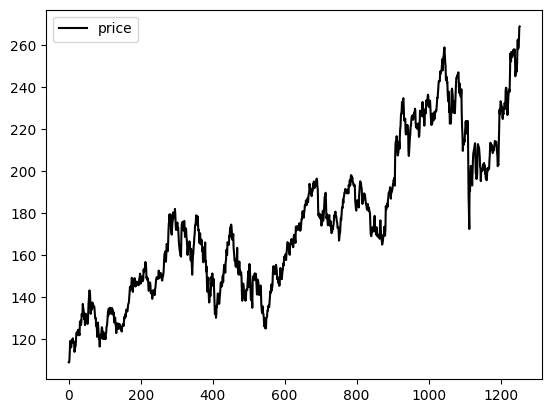

In [119]:
import matplotlib.pyplot as plt
plt.plot(df1,label='price',color='black')
plt.legend()

In [121]:
df.shape

(1254, 12)

In [120]:
m=MinMaxScaler(feature_range=(0,1))
df1=m.fit_transform(np.array(df1).reshape(-1,1))

In [122]:
df1

array([[5.61692567e-04],
       [0.00000000e+00],
       [1.04225176e-02],
       ...,
       [9.61430444e-01],
       [9.98814205e-01],
       [1.00000000e+00]])

In [123]:
df1.shape

(1254, 1)

In [124]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size

In [125]:
train_size,test_size

(815, 439)

In [126]:
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [127]:
def create(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [128]:
time_step=100
x_train,y_train=create(train_data,time_step)
x_test,y_test=create(test_data,time_step)

In [129]:
x_train.shape

(714, 100)

In [130]:
x_test.shape

(338, 100)

In [131]:
y_train.shape

(714,)

In [132]:
y_test.shape

(338,)

In [133]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [134]:
model=Sequential([
    LSTM(50,return_sequences=True,input_shape=(100,1)),
    LSTM(50,return_sequences=True),
    LSTM(50),
    Dense(20),
    Dense(1)

])

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,841 (202.50 KB)

 Trainable params: 51,841 (202.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [137]:
e=EarlyStopping(monitor='val_loss',patience=10,mode='min')
mc=ModelCheckpoint('stockPrice.keras',monitor='val_acc',verbose=1,save_best_only=True,mode='max')
re=ReduceLROnPlateau(monitor='val_loss',factor=0.01,patience=10,verbose=1,mode='min')

In [138]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1,shuffle=False,callbacks=[e,mc,re])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - loss: 0.0186 - val_loss: 0.0216 - learning_rate: 0.0010
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 0.0068 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 0.0068 - val_loss: 0.0136 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0029 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0020 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 0.0019 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0020 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0023 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.0026 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 0.0026 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 11/100

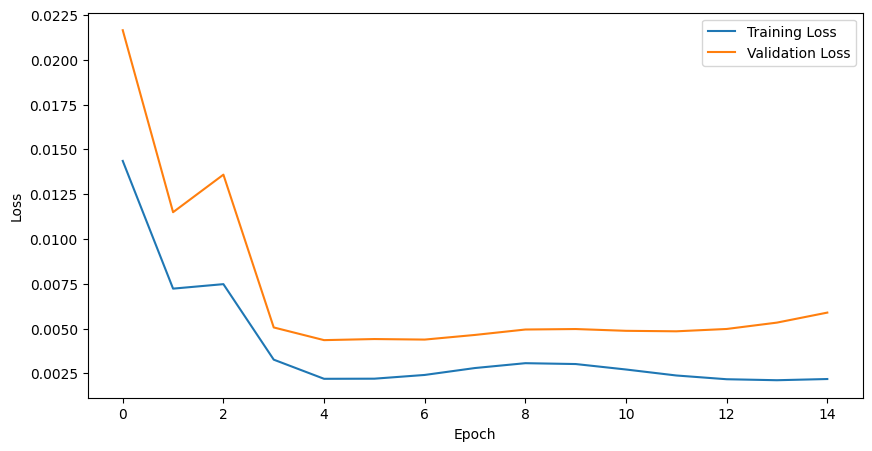

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [140]:
  train_predict=model.predict(x_train)
  test_predict=model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [141]:
train_predict=m.inverse_transform(train_predict)
test_predict=m.inverse_transform(test_predict)

In [142]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.22968967062673

In [143]:
math.sqrt(mean_squared_error(y_test,test_predict))

232.29209051036474

In [144]:
import numpy

In [145]:
from sklearn.preprocessing import MinMaxScaler

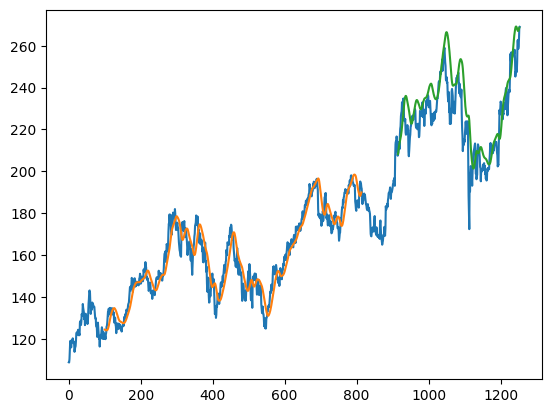

In [146]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(m.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [159]:

last_100_days = train_data[-100:]

In [160]:
X_test_explicit = last_100_days.reshape(1, 100, 1)

In [161]:
predicted_scaled_price = model.predict(X_test_explicit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
predicted_actual_price = m.inverse_transform(predicted_scaled_price)

In [164]:
predicted_actual_price

array([[191.52487]], dtype=float32)